# Einführung in die Klassifikation mit sklearn

In [2]:
#Importieren der "Standard-Module"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings


#Module und Funktionen für die Interaktion mit der Datenbank
#import mysql.connector
#from sqlalchemy import create_engine, exc

#Module für Demo-Daten
from sklearn.datasets import *
import statsmodels.formula.api as smf

#Sonstige Module und Funktionen
from time import gmtime, strftime #Für die aktuelle Zeit

In [3]:
#Einstellen der Darstellungsoptionen

#Pandas - Mehr Zeilen und Spalten anzeigen
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#Seaborn
sns.set_style("darkgrid")
plt.matplotlib.style.use('default')
%matplotlib inline

my_colors = ["windows blue", "saffron", "hot pink", "algae green", "dusty purple", 
             "greyish", "petrol", "denim blue", "lime"]

sns.set_palette(sns.xkcd_palette(my_colors))
colors = sns.xkcd_palette(my_colors)

#Warnings
warnings.filterwarnings("ignore")

In [4]:
#Selbstgeschriebene Funktionen

#Meine Datenzusammenfassung
def my_df_summary(data):
    '''Eigene Funktion für die Summary'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.min(), dat.max(), dat.mean(), dat.std(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Minimum', 'Maximum', 'Mittelwert', 'Stand. Abw.','#NA', '#Uniques', 'dtypes'])        
        return df
    except:
        print('Es konnte keine Summary erstellt werden.')
        return data


## Datensatz laden

In [5]:
#dataset = load_iris()
dataset = load_wine()

#Zu den Datensätzen, die über sklearn geladen werden können, gibt es in den meisten Fällen eine Doku.
print(dataset.DESCR)

df = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']], columns= dataset['feature_names'] + ['target'])
df.target = df.target.astype(int)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
#df.target = df.target.astype(int)

## Explorative Datenanalyse

In [70]:
df.head(70)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [8]:
my_df_summary(df)
print('Es sind {} Datenzeilen enthalten'.format(len(df)))

Es sind 178 Datenzeilen enthalten


In [9]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

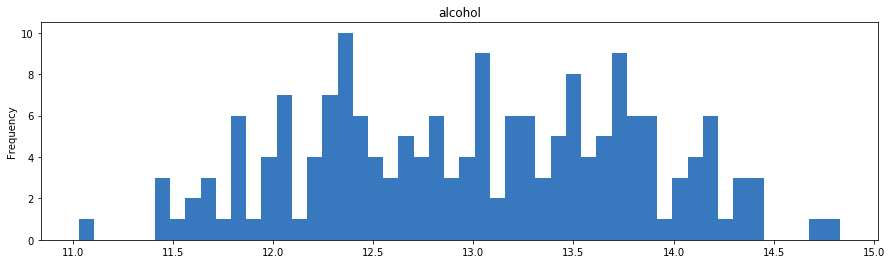

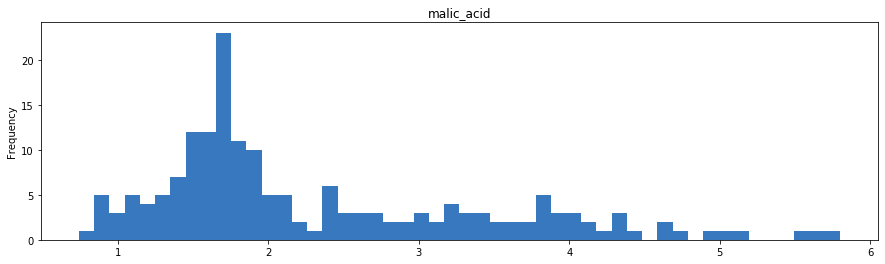

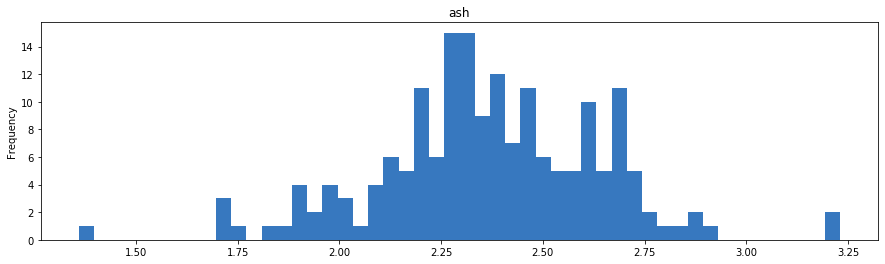

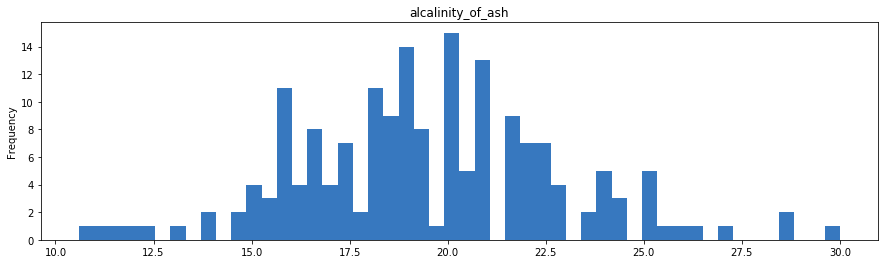

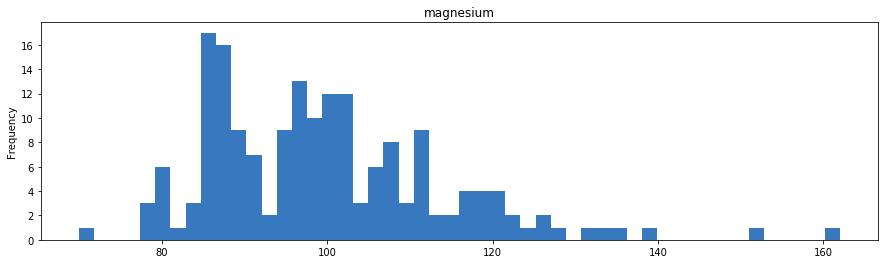

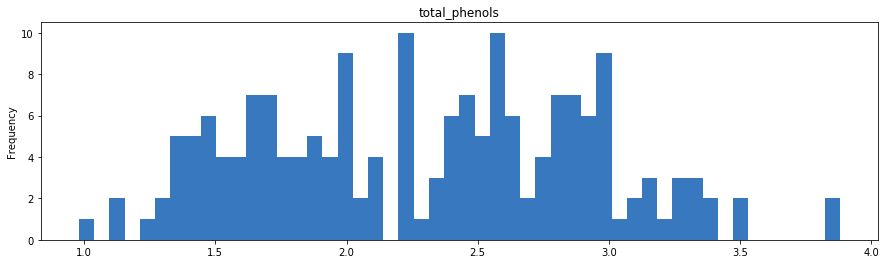

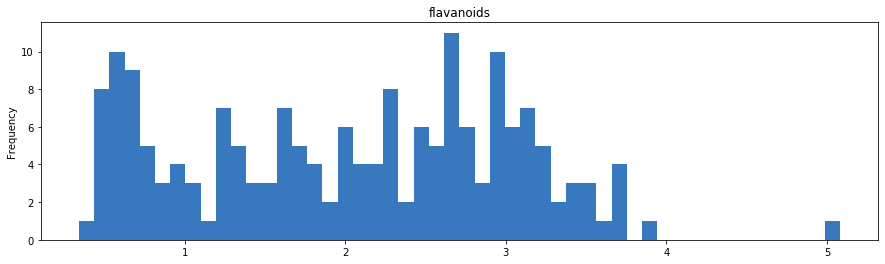

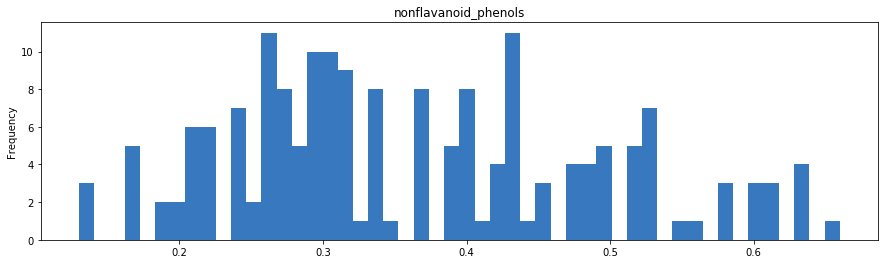

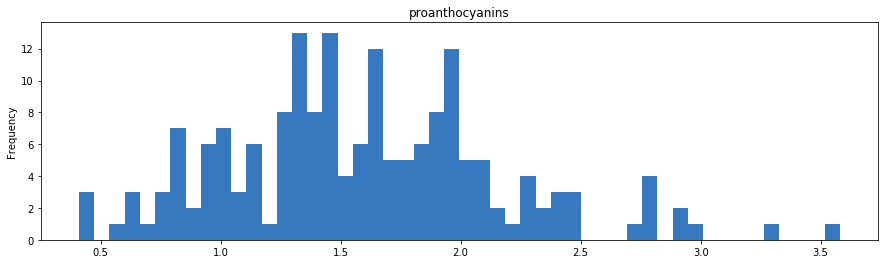

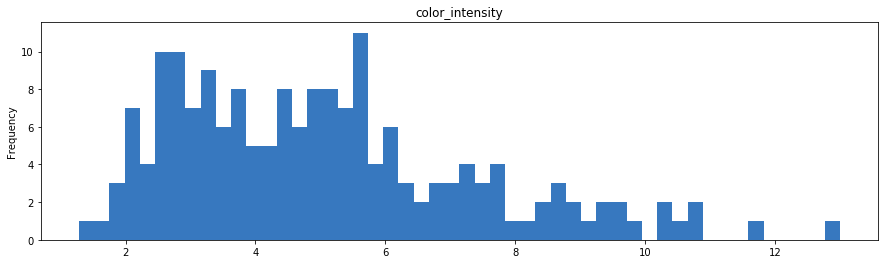

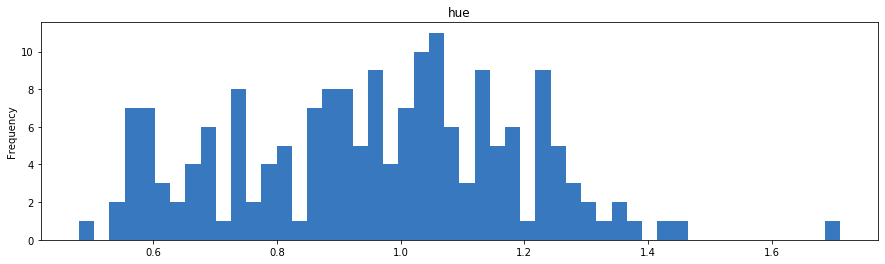

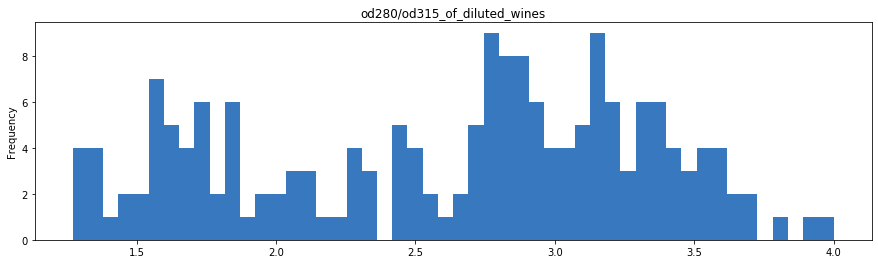

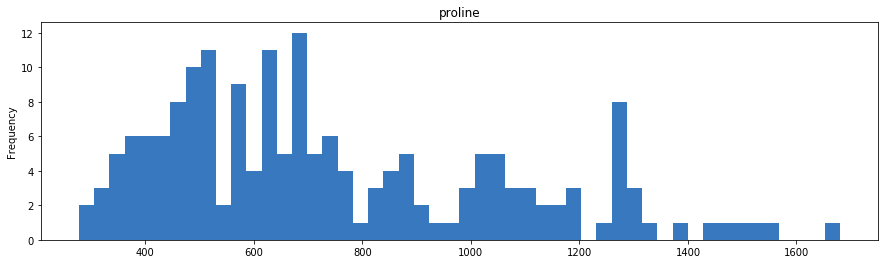

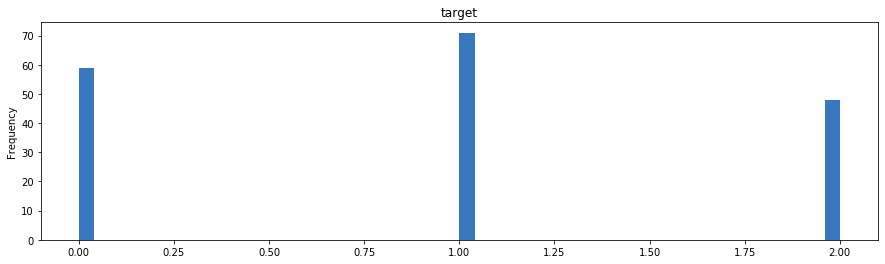

In [10]:
l=list(df.columns)
for i in range(len(l)):
    fig = df.iloc[:,i].plot(kind='hist', bins=50, figsize=(15,4))
    plt.title(df.columns[i])
    plt.show()    

<font size=3> Wichtig: Für eine Klassifikation benötigen wir eine möglichst gleichmäßige Anzahl an Beobachtungen in allen "Ziel-Kategrien"!

## Was tun, wenn die Anzahl an Beobachtungen in den Target-Klassen ungleichmäßig ist?

Under-Sampling ist eine Möglichkeit. Dabei werden zufällig komplette Datenzeilen aus den überrepräsentierten Target-Klassen aus dem Datensatz geworfen.

**Achtung: Dafür muss vielleicht imblearn installiert werden. Siehe nächste Zeile.**

In [11]:
#!pip install --user imblearn

In [12]:
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
rus = RandomUnderSampler(random_state=0)

In [ ]:
X = df.iloc[:,0:df.shape[1]-1].copy()
y = df.iloc[:,-1].copy()
X_resampled, y_resampled = rus.fit_sample(X, y)

X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.Series(y_resampled)

df = X.copy()
df['target']=y.copy()

In [ ]:
fig = df.iloc[:,-1].plot(kind='hist', bins=50, figsize=(15,4))
plt.title('Die Zielvariable {} mit gleicher Häufigkeit'.format(df.columns[-1]))
plt.show() 

## Korrelationsanalyse

In [ ]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), vmin=-1,cmap='PiYG', annot=True);
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

<font size=3> Wichtig: Für manche Klassifikationsverfahren ist es wichtig, ob die Features (erklärenden Variablen) korreliert untereinander sind.

## Klassifikationsverfahren identifizieren die Bedeutung von Features

In [13]:
#Welche Variablen haben eine besonders auffällige Korrelation mit der Zielgröße?
df.corr().iloc[0:(len(df.columns)-1),-1].abs().sort_values(ascending=False)

flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
Name: target, dtype: float64

In [14]:
imp = df.corr().iloc[0:(len(df.columns)-1),-1].abs().sort_values(ascending=False)

In [15]:
limp = list(imp.index[0:2].values)

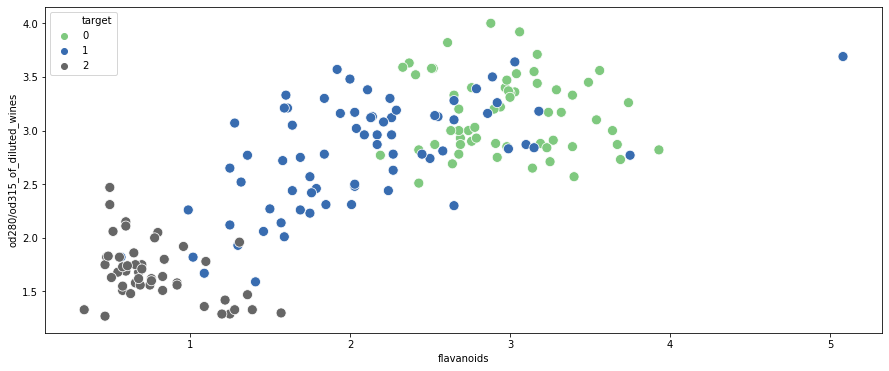

In [16]:
plt.figure(figsize=(15,6))
fig = sns.scatterplot(x=limp[0], y=limp[1], hue='target', data=df, palette='Accent', s=100)
plt.show()

## Unterteilen in Trainings- und Testdaten

<font size=3> Um zu bewerten, wie gut ein Klassifikator funktioniert hat, brauchen wir Trainings- und Test-Daten.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Wir splitten "zufällig". D.h. wir teilen zufällt in i_split% Trainings- und Testdaten auf
i_split = 0.30
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:df.shape[1]-1], df.iloc[:,-1], test_size=i_split,
                                                    random_state=1234)

In [19]:
len(X_train)

124

## Support Vector Machines

<font size=3> Link: https://de.wikipedia.org/wiki/Support_Vector_Machine

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()

In [22]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
model_svm = model #Speichern des Modells, falls man es später nochmal untersuchen möchte.

In [24]:
predictions = model.predict(X_test)

## Wie kann man anschauen, was ein Modell vorhergesagt hat?

In [25]:
df_ModRes = X_train.reset_index(drop=True).copy()
df_ModRes['Y tatsächlich'] = y_test.reset_index(drop=True).copy()
df_ModRes['Y geschätzt'] = pd.Series(predictions)
df_ModRes.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y tatsächlich,Y geschätzt
0,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,1.0,1.0
1,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,1.0,1.0
2,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0,1.0,1.0
3,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0,1.0,1.0
4,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,2.0,1.0


## Wie gut war ein Klassifikationsverfahren?

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

### Konfusionsmatrix
<font size = 3>Es wird gezählt, wie häufig jede der vier möglichen Kombinationen von "ermittelte Klasse" und "tatsächliche Klasse" vorgekommen ist. Diese Häufigkeiten werden in eine sogenannte Wahrheitsmatrix (auch Konfusionsmatrix genannt) eingetragen.<br>

Link: https://de.wikipedia.org/wiki/Beurteilung_eines_bin%C3%A4ren_Klassifikators <br><br>
    
Alternativ: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [27]:
df_conf_matrix = confusion_matrix(y_test,predictions)

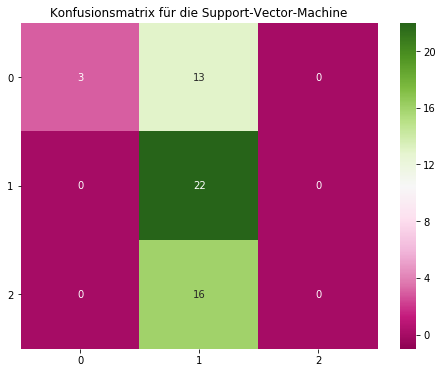

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für die Support-Vector-Machine')
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Alternativ zur Konfusionsmatrix können verschiedene Gütemaße verwendet werden.
<font size = 3> Eine Zusammenstellung geeigneter Gütemaße bietet der Classification Report.

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32        16
           1       0.43      1.00      0.60        22
           2       0.00      0.00      0.00        16

    accuracy                           0.46        54
   macro avg       0.48      0.40      0.31        54
weighted avg       0.47      0.46      0.34        54



**Alle Kennzahlen können natürlich auch einzeln importiert werden.** <br>
Eine Übersicht findet sich hier https://scikit-learn.org/stable/modules/classes.html (im Bereich "Classification metrics")

## Naive Bayes Klassifikation

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model = GaussianNB()

In [32]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
model_nb = model #Speichern des Modells, falls man es später nochmal untersuchen möchte.

In [34]:
predictions = model.predict(X_test)

In [35]:
AnzFehler = np.sum((y_test!=predictions))
print("Bei einem Test-Datensatz der Länge {} wurden {} Beobachtungen falsch klassifiziert.".format(len(y_test),AnzFehler))

Bei einem Test-Datensatz der Länge 54 wurden 4 Beobachtungen falsch klassifiziert.


In [36]:
df_conf_matrix = confusion_matrix(y_test,predictions)

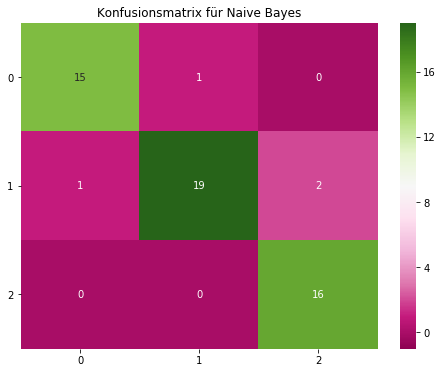

In [37]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für Naive Bayes')
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.86      0.90        22
           2       0.89      1.00      0.94        16

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



## Entscheidungsbäume

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
model_dt = model #Speichern des Modells, falls man es später nochmal untersuchen möchte.

In [43]:
predictions = model.predict(X_test)

In [44]:
AnzFehler = np.sum((y_test!=predictions))
print("Bei einem Test-Datensatz der Länge {} wurden {} Beobachtungen falsch klassifiziert.".format(len(y_test),AnzFehler))

Bei einem Test-Datensatz der Länge 54 wurden 7 Beobachtungen falsch klassifiziert.


In [45]:
df_conf_matrix = confusion_matrix(y_test,predictions)

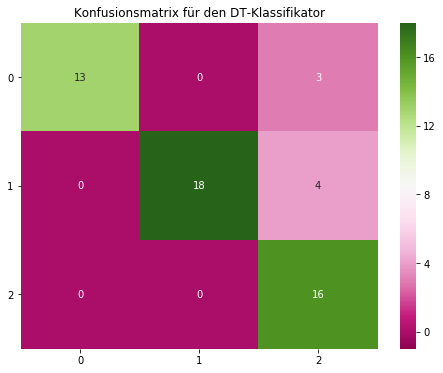

In [46]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für den DT-Klassifikator')
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       1.00      0.82      0.90        22
           2       0.70      1.00      0.82        16

    accuracy                           0.87        54
   macro avg       0.90      0.88      0.87        54
weighted avg       0.91      0.87      0.88        54



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier(n_estimators=600)

In [50]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
model_rf = model #Speichern des Modells, falls man es später nochmal untersuchen möchte.

In [52]:
predictions = model.predict(X_test)

In [53]:
AnzFehler = np.sum((y_test!=predictions))
print("Bei einem Test-Datensatz der Länge {} wurden {} Beobachtungen falsch klassifiziert.".format(len(y_test),AnzFehler))

Bei einem Test-Datensatz der Länge 54 wurden 2 Beobachtungen falsch klassifiziert.


In [54]:
df_conf_matrix = confusion_matrix(y_test,predictions)

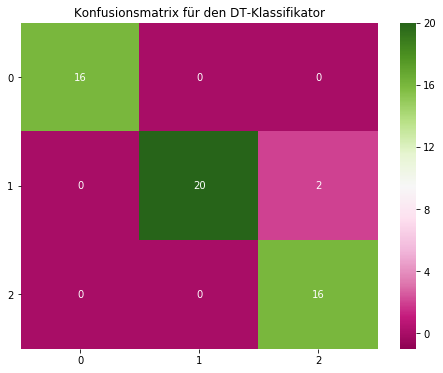

In [55]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für den DT-Klassifikator')
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        22
           2       0.89      1.00      0.94        16

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [57]:
model_svm.support_vectors_

array([[1.348e+01, 1.810e+00, 2.410e+00, ..., 1.040e+00, 3.470e+00,
        9.200e+02],
       [1.406e+01, 1.630e+00, 2.280e+00, ..., 1.090e+00, 3.710e+00,
        7.800e+02],
       [1.388e+01, 1.890e+00, 2.590e+00, ..., 8.800e-01, 3.560e+00,
        1.095e+03],
       ...,
       [1.258e+01, 1.290e+00, 2.100e+00, ..., 5.800e-01, 1.550e+00,
        6.400e+02],
       [1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.311e+01, 1.900e+00, 2.750e+00, ..., 6.100e-01, 1.330e+00,
        4.250e+02]])

## Wie kann man denn mit Regression-Modellen klassifizieren?

In [58]:
df = df.rename(columns={'od280/od315_of_diluted_wines': 'od280'})

In [59]:
all_columns = "+".join(df.columns)

In [60]:
all_columns = all_columns.replace('+target', '')

In [61]:
my_formula = "y~" + all_columns

In [62]:
lm = smf.ols(formula=my_formula, data=df).fit()

PatsyError: Error evaluating factor: NameError: name 'y' is not defined
    y~alcohol+malic_acid+ash+alcalinity_of_ash+magnesium+total_phenols+flavanoids+nonflavanoid_phenols+proanthocyanins+color_intensity+hue+od280+proline
    ^

In [ ]:
#lm.summary()

In [63]:
X_test_ = X_test.rename(columns={'od280/od315_of_diluted_wines': 'od280'})

In [64]:
predictions = lm.predict(X_test_)

NameError: name 'lm' is not defined

In [65]:
predictions = predictions.astype(int)

In [66]:
df_conf_matrix = confusion_matrix(y_test,predictions)

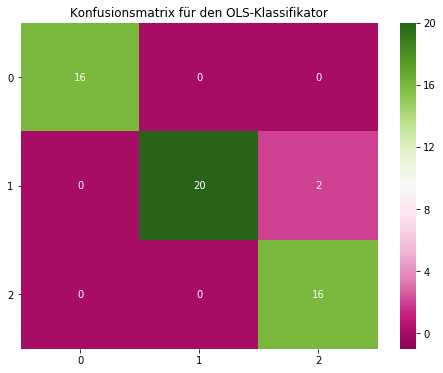

In [67]:
plt.figure(figsize = (8,6))
sns.heatmap(df_conf_matrix, vmin=-1, cmap='PiYG', annot=True)
plt.title('Konfusionsmatrix für den OLS-Klassifikator')
plt.yticks(rotation=0)

#Nur notwendig, weil Grafik bei einer anderen Version von matplotlib (>3.3) sonst verzerrt. Bekannter Bug.
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        22
           2       0.89      1.00      0.94        16

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

